## H·ªçc ph·∫ßn: Th·ªã gi√°c m√°y t√≠nh
#### H·ªç t√™n: Ph·∫°m Ph∆∞·ªõc B·∫£o T√≠n
#### M√£ sinh vi√™n: 22E1020021

## M√¥ t·∫£ d·ªØ li·ªáu
- B·ªô d·ªØ li·ªáu v·ªÅ ph√¢n lo·∫°i "Shoe", "Sandal", "Boot". Ngu·ªìn d·ªØ li·ªáu : Kaggle ([Shoe vs Sandal vs Boot Image Dataset](https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images?fbclid=IwZXh0bgNhZW0CMTEAAR4Qhm5prfJKpfYH3kwbWi-Tcsk1Q1AHnBqh4scpOWhT4CTERDLwisuTuvNcDg_aem_8fGVUmMtZuHu_Cmj3jxaCg)).
- Ba l·ªõp 3 th∆∞ m·ª•c ri√™ng, m·ªói th∆∞ m·ª•c 5000 ·∫£nh.


## Chu·∫©n b·ªã d·ªØ li·ªáu  + Theo d√µi t·ª´ng k, neen ch·ªçn b∆∞·ªõc nh·∫£y l√† +2

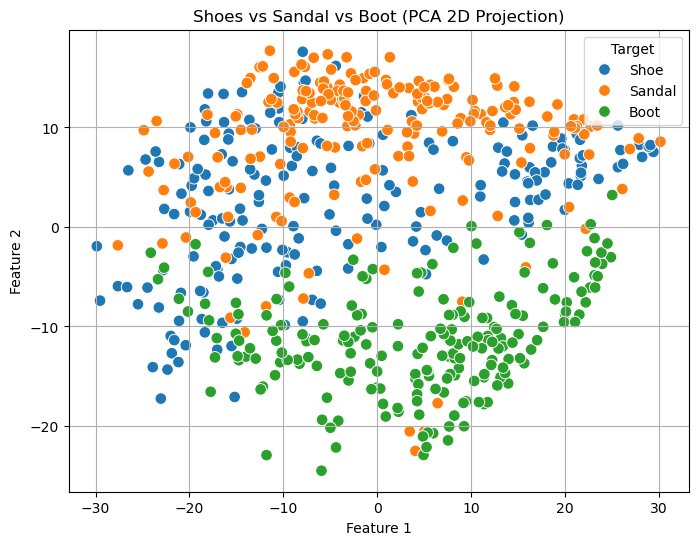

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from sklearn.decomposition import PCA
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import pandas as pd
# ======================
# 1. Chu·∫©n b·ªã d·ªØ li·ªáu
# ======================
data_dir = r"D:\Shoe vs Sandal vs Boot Dataset"
classes = ["Shoe", "Sandal", "Boot"]

IMG_SIZE = 90  # resize ·∫£nh k√≠ch th∆∞·ªõc 120x120

X = []
y = []

img_size = (64, 64)

for label, c in enumerate(classes):
    folder = os.path.join(data_dir, c)
    for img_file in os.listdir(folder)[:200]:  # l·∫•y 50 ·∫£nh cho nh·∫π
        img = load_img(os.path.join(folder, img_file), target_size=img_size)
        arr = img_to_array(img).flatten() / 255.0
        X.append(arr)
        y.append(c)  # d√πng t√™n class thay v√¨ s·ªë cho d·ªÖ ƒë·ªçc

X = np.array(X)
#PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

df = pd.DataFrame(X_2d, columns=["Feature 1", "Feature 2"])
df["Target"] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x="Feature 1", y="Feature 2",
    hue="Target", palette="tab10", legend="full", s=70
)
plt.title("Shoes vs Sandal vs Boot (PCA 2D Projection)")
plt.grid(True)
plt.show()


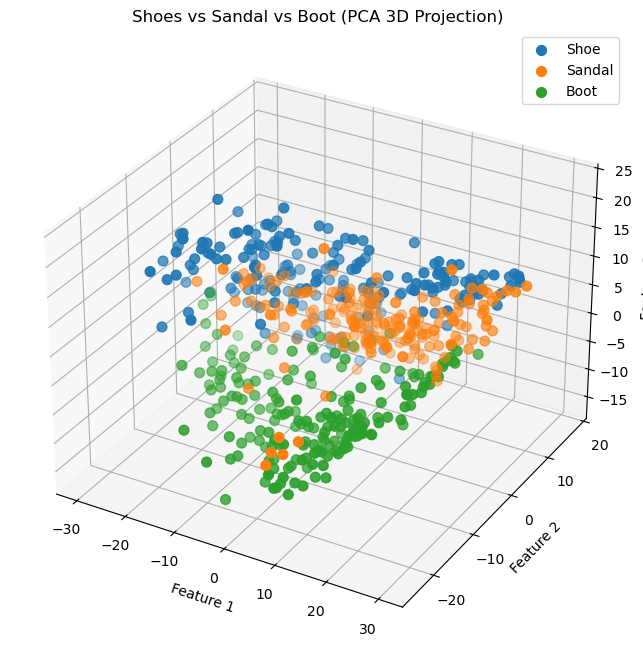

In [20]:
#PCA 3 chi·ªÅu
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X)

df = pd.DataFrame(X_3d, columns=["Feature 1", "Feature 2", "Feature 3"])
df["Target"] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for target in df["Target"].unique():
    subset = df[df["Target"] == target]
    ax.scatter(subset["Feature 1"], subset["Feature 2"], subset["Feature 3"], label=target, s=50)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("Shoes vs Sandal vs Boot (PCA 3D Projection)")
ax.legend()
plt.show()

In [10]:
X = []
y = []
for label, class_name in enumerate(classes):
    folder = os.path.join(data_dir, class_name)
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X.append(img.flatten())
        y.append(label)

X = np.array(X)
y = np.array(y)
# ======================
# 2. Ti·ªÅn x·ª≠ l√Ω & chia d·ªØ li·ªáu
# ======================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

k=1, Accuracy=0.9043
k=3, Accuracy=0.9003
k=5, Accuracy=0.8933
k=7, Accuracy=0.8877
k=9, Accuracy=0.8827
k=11, Accuracy=0.8793
k=13, Accuracy=0.8757
k=15, Accuracy=0.8733


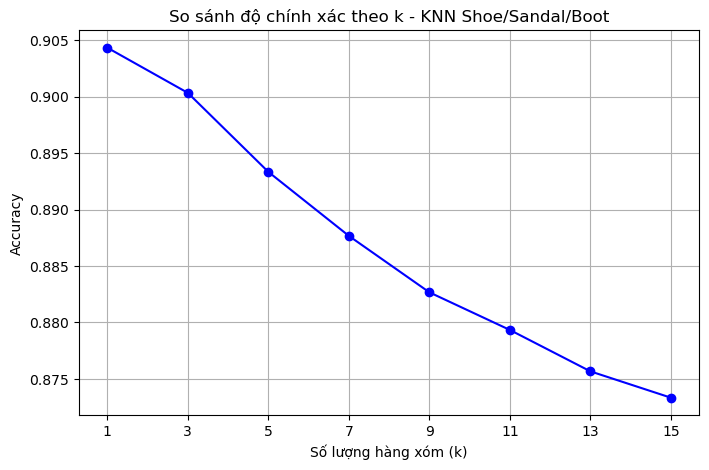

In [11]:


# 3. So s√°nh accuracy theo k
# ======================
k_values = range(1, 16, 2)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k={k}, Accuracy={acc:.4f}")

# V·∫Ω bi·ªÉu ƒë·ªì
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker="o", linestyle="-", color="b")
plt.xticks(k_values)
plt.xlabel("S·ªë l∆∞·ª£ng h√†ng x√≥m (k)")
plt.ylabel("Accuracy")
plt.title("So s√°nh ƒë·ªô ch√≠nh x√°c theo k - KNN Shoe/Sandal/Boot")
plt.grid(True)
plt.show()


Ch·ªçn k (t·ª´ k·∫øt qu·∫£ th·ª≠ nghi·ªám tr√™n)

In [15]:
# ======================
# 3. Hu·∫•n luy·ªán KNN
# ======================
k=3 
knn_k = KNeighborsClassifier(n_neighbors=k)
knn_k.fit(X_train, y_train)

# ======================
# 4. ƒê√°nh gi√° m√¥ h√¨nh
# ======================
y_pred = knn_k.predict(X_test)

print("üîπ Accuracy:", accuracy_score(y_test, y_pred))
print("\nüîπ Classification Report:\n", classification_report(y_test, y_pred, target_names=classes))



üîπ Accuracy: 0.9003333333333333

üîπ Classification Report:
               precision    recall  f1-score   support

        Shoe       0.88      0.93      0.90      1000
      Sandal       0.96      0.78      0.86      1000
        Boot       0.88      0.99      0.93      1000

    accuracy                           0.90      3000
   macro avg       0.91      0.90      0.90      3000
weighted avg       0.91      0.90      0.90      3000



V·∫Ω ma tr·∫≠n nh·∫ßm l·∫´n v·ªõi K ƒë√£ ch·ªçn

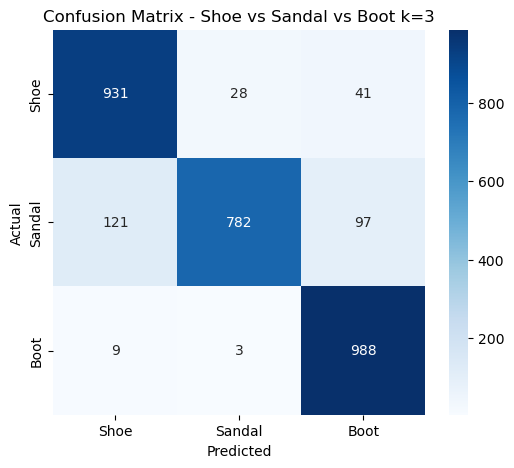

In [8]:
# 5. Ma tr·∫≠n nh·∫ßm l·∫´n
# ======================
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix - Shoe vs Sandal vs Boot k={k}")
plt.show()


## H√†m ph√¢n lo·∫°i t·ª´ ·∫£nh t·∫£i ng·∫´u nhi√™n tr√™n internet

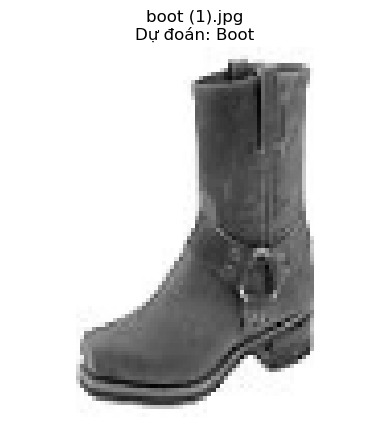

boot (1).jpg ‚Üí Boot


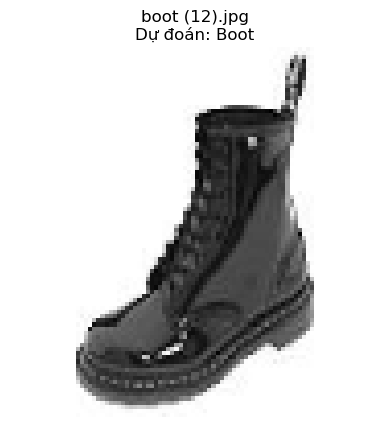

boot (12).jpg ‚Üí Boot


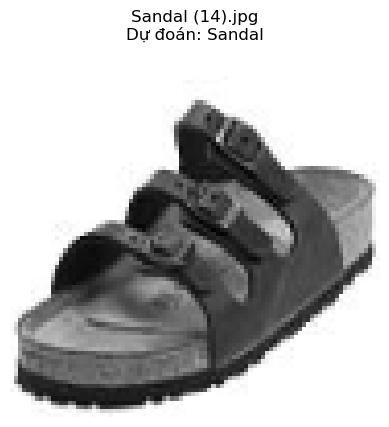

Sandal (14).jpg ‚Üí Sandal


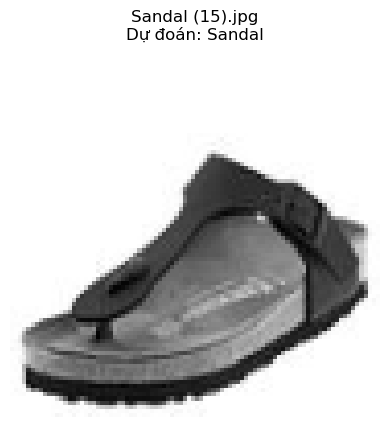

Sandal (15).jpg ‚Üí Sandal


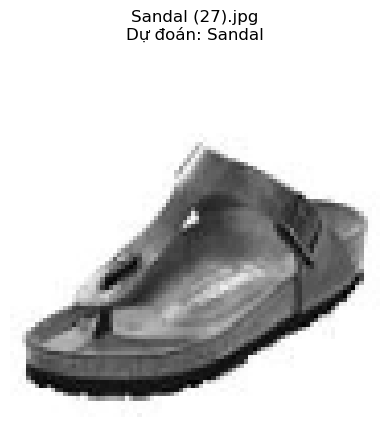

Sandal (27).jpg ‚Üí Sandal


In [11]:
def predict_folder(folder_path, limit=10):
    results = []
    count = 0
    for filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is None:
            continue
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        img_flat = img.flatten().reshape(1, -1)
        img_scaled = scaler.transform(img_flat)
        prediction = knn_k.predict(img_scaled)[0]
        results.append((filename, classes[prediction]))

        # Hi·ªÉn th·ªã ·∫£nh + nh√£n d·ª± ƒëo√°n
        plt.imshow(img, cmap="gray")
        plt.title(f"{filename}\nD·ª± ƒëo√°n: {classes[prediction]}")
        plt.axis("off")
        plt.show()

        print(f"{filename} ‚Üí {classes[prediction]}")

        count += 1
        if limit and count >= limit:  # gi·ªõi h·∫°n s·ªë ·∫£nh hi·ªÉn th·ªã (m·∫∑c ƒë·ªãnh 10)
            break
    
    return results

# V√≠ d·ª•: d·ª± ƒëo√°n to√†n b·ªô ·∫£nh trong th∆∞ m·ª•c test
test_dir = r"D:\Shoe vs Sandal vs Boot Dataset\test"
results = predict_folder(test_dir, limit=5)  # hi·ªÉn th·ªã th·ª≠ 5 ·∫£nh ƒë·∫ßu


In [13]:
# ======================
# 6. H√†m d·ª± ƒëo√°n ·∫£nh m·ªõi
# ======================
def predict_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("‚ùå Kh√¥ng ƒë·ªçc ƒë∆∞·ª£c ·∫£nh:", image_path)
        return
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_flat = img.flatten().reshape(1, -1)
    img_scaled = scaler.transform(img_flat)
    prediction = knn_k.predict(img_scaled)[0]
    
    # Hi·ªÉn th·ªã ·∫£nh
    plt.imshow(img, cmap="gray")
    plt.title(f"D·ª± ƒëo√°n: {classes[prediction]}")
    plt.axis("off")
    plt.show()

    print(f"·∫¢nh {image_path} ƒë∆∞·ª£c d·ª± ƒëo√°n l√†: {classes[prediction]}")
    

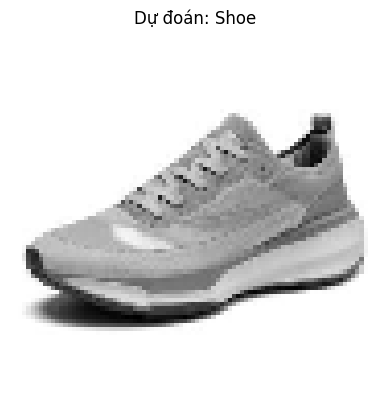

·∫¢nh D:\datasets\t11.jpg ƒë∆∞·ª£c d·ª± ƒëo√°n l√†: Shoe


In [53]:
# V√≠ d·ª• d·ª± ƒëo√°n 1 ·∫£nh m·ªõi
predict_image(r"D:\datasets\t11.jpg")

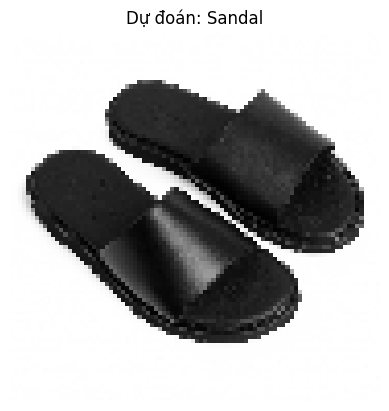

·∫¢nh D:\datasets\t1.jpg ƒë∆∞·ª£c d·ª± ƒëo√°n l√†: Sandal


In [41]:
# V√≠ d·ª• d·ª± ƒëo√°n 1 ·∫£nh m·ªõi
predict_image(r"D:\datasets\t1.jpg")

In [14]:
# V√≠ d·ª• d·ª± ƒëo√°n 1 ·∫£nh m·ªõi
predict_image(r"D:\Shoe vs Sandal vs Boot Dataset\551635737_1437925444100423_8057986009119178849_n (1).png")

NameError: name 'knn_k' is not defined

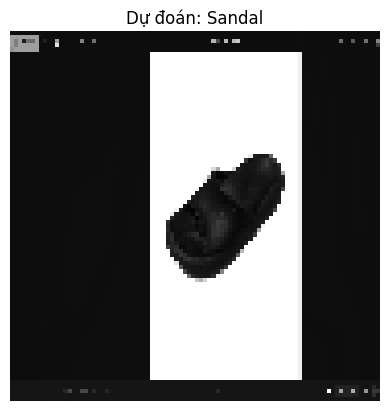

·∫¢nh D:\datasets\t13.png ƒë∆∞·ª£c d·ª± ƒëo√°n l√†: Sandal


In [43]:
# V√≠ d·ª• d·ª± ƒëo√°n 1 ·∫£nh m·ªõi
predict_image(r"D:\datasets\t13.png")

In [12]:
predict_image(r"D:\Shoe vs Sandal vs Boot Dataset\551635737_1437925444100423_8057986009119178849_n (1).png")

NameError: name 'predict_image' is not defined

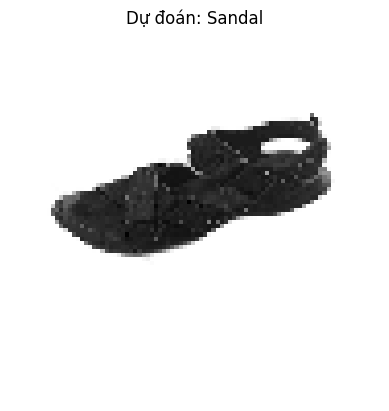

·∫¢nh D:\datasets\t20.png ƒë∆∞·ª£c d·ª± ƒëo√°n l√†: Sandal


In [65]:
predict_image(r"D:\datasets\t20.png")